<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/Single_layer_perceptron_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Single layer Perceptron - Multiclass**

---

In this tutorial, we will continue to learn about single layer perceptron from [previous lesson](https://github.com/harishmuh/Deep-Learning_study/blob/main/Single_perceptron_Iris_dataset.ipynb). We will still use the same dataset, iris flower, and use only two features `sepal length` and `sepal width`. However, this time we will use all three classes of flower (`iris setosa`, `iris versicolor`, and `iris virginica`)

**Importing libraries**

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


**Loading dataset**

In [2]:
# Loading dataset
iris = load_iris()
X = iris.data[:, :2]    # Use 2 features: sepal length, sepal width
y = iris.target         # 0, 1, 2




In [ ]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Defining perceptron model**

In [3]:
# Defining perceptron model (Softmax - multiclass)
model = Sequential([
    Dense(
        units=3,              # one neuron per class
        input_shape=(2,),
        activation='softmax'  # multiclass generalization
    )
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model compilation**

In [4]:
# Compiling model
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


**Training**

In [5]:
# Model training
model.fit(
    X_scaled,
    y,
    epochs=300,
    verbose=0
)


**Model evaluation**

In [6]:
# Evaluation
loss, acc = model.evaluate(X_scaled, y, verbose=0)
print(f"Training accuracy: {acc:.3f}")


Training accuracy: 0.793


The training accuracy of this single layer perceptron (multiclass) is lower than the [previous experiment](https://github.com/harishmuh/Deep-Learning_study/blob/main/Single_perceptron_Iris_dataset.ipynb) with single layer perceptron (binary class) which has about 0.99 accuracy.

**Decision Region Visualization**

In [7]:
# Creating grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]


In [8]:
# Predicting class on Grid
Z = model.predict(grid)
Z_class = np.argmax(Z, axis=1)
Z_class = Z_class.reshape(xx.shape)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


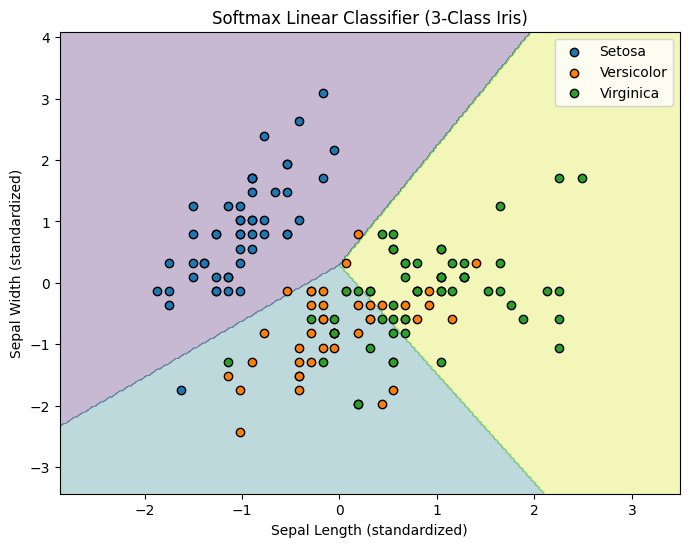

In [9]:
# Plotting decision regions
plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z_class, alpha=0.3)

plt.scatter(
    X_scaled[y == 0, 0], X_scaled[y == 0, 1],
    label="Setosa", edgecolor="k"
)
plt.scatter(
    X_scaled[y == 1, 0], X_scaled[y == 1, 1],
    label="Versicolor", edgecolor="k"
)
plt.scatter(
    X_scaled[y == 2, 0], X_scaled[y == 2, 1],
    label="Virginica", edgecolor="k"
)

plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title("Softmax Linear Classifier (3-Class Iris)")
plt.legend()
plt.show()


We can see the result as
* Each boundary is separated with linear line.
* While Setosa is relatively separated, Versicolor and Virginica results not perfectly linearly separable (some are overlap). This causes lower training accuracy (0.79).
* Errors occur where classes are not linearly separable

In [10]:
# Inspecting learned weights
W, b = model.layers[0].get_weights()

print("Weights:\n", W)
print("\nBias:\n", b)


Weights:
 [[-2.1245604  -0.28745785  0.68569267]
 [ 1.7613043  -0.24164715  0.30673987]]

Bias:
 [-0.3393337   0.25339743  0.08593586]


**Each column corrsepond to one class**

| Class          | Sepal length | Sepal width | Bias   |
| -------------- | ------------ | ----------- | ------ |
| Setosa (0)     | −2.125       | +1.761      | −0.339 |
| Versicolor (1) | −0.287       | −0.242      | +0.253 |
| Virginica (2)  | +0.686       | +0.307      | +0.086 |


**Equation of all class**

`Setosa (Blue Region)`

* 𝑧0 = −2.125𝑥length + 1.761𝑥width −0.339

`Versicolor (Orange region)`

* z1​=−0.287xlength​−0.242xwidth​+0.253

`Virginica (Green region)`

* z2​=0.686xlength​+0.307xwidth​+0.086
